# Quantium Data Analytics Virtual Experience Program (via [InsideSherpa](https://www.insidesherpa.com/virtual-internships/NkaC7knWtjSbi6aYv))

In [2]:
# !git push origin master

### Exploratory Data Analysis + Preparation

In [3]:
import numpy as np
import pandas as pd
import cufflinks as cf
import plotly.io as pio
import plotly.express as px
import plotly.graph_objs as go
import plotly.figure_factory as ff
from plotly.subplots import make_subplots

cf.go_offline()
pio.renderers.default = 'png' # Change to 'notebook' for interactive graph or just comment this line (automatically use default value)

In [4]:
trans_df = pd.read_csv('QVI_transaction_data.csv')
behav_df = pd.read_csv('QVI_purchase_behaviour.csv')
len(trans_df), len(behav_df)

(264836, 72637)

In [5]:
trans_df.head()

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES
0,43390,1,1000,1,5,Natural Chip Compny SeaSalt175g,2,6.0
1,43599,1,1307,348,66,CCs Nacho Cheese 175g,3,6.3
2,43605,1,1343,383,61,Smiths Crinkle Cut Chips Chicken 170g,2,2.9
3,43329,2,2373,974,69,Smiths Chip Thinly S/Cream&Onion 175g,5,15.0
4,43330,2,2426,1038,108,Kettle Tortilla ChpsHny&Jlpno Chili 150g,3,13.8


In [6]:
behav_df = behav_df.rename(columns={'PREMIUM_CUSTOMER': 'MEMBER_TYPE'})

In [7]:
behav_df.head()

,LYLTY_CARD_NBR,LIFESTAGE,MEMBER_TYPE
0,1000,YOUNG SINGLES/COUPLES,Premium
1,1002,YOUNG SINGLES/COUPLES,Mainstream
2,1003,YOUNG FAMILIES,Budget
3,1004,OLDER SINGLES/COUPLES,Mainstream
4,1005,MIDAGE SINGLES/COUPLES,Mainstream


In [8]:
def make_bar_graph(x, y, text, title, texttemplate=None, textposition='inside', orientation='h', yaxis={'categoryorder':'total ascending'}):
    '''
    Function to make bar graph with parameter:
    * x: Data to be shown in x cordinate
    * y: Data to be shown in y cordinate
    * text: Value or text to shown in the bar
    * title: The title of the graph
    * texttemplate: Text formatting to be shown
    * textposition: The text position ('inside', 'outside')
    * orientation: The orientation to make vertical or horizontal bar graph ('v', 'h')
    * yaxis: Filter for horizontal bar graph (set to None if the orientation 'V')
    '''
    fig = go.Figure(data=
                    go.Bar(y = y,
                           x = x,
                           text = text,
                           texttemplate = texttemplate,
                           textposition = textposition,
                           orientation = orientation)
    )
    fig.update_layout(title=title, yaxis=yaxis)
    return fig

In [9]:
# Join these 2 datasets
trans_df = trans_df.set_index('LYLTY_CARD_NBR').join(behav_df.set_index('LYLTY_CARD_NBR'))
trans_df = trans_df.reset_index()
trans_df = trans_df.sort_values(by='DATE').reset_index(drop=True)

In [10]:
trans_df['DATE'] = pd.to_datetime(trans_df['DATE'], origin = '1899-12-30', unit='D')

In [11]:
trans_df.head()

,LYLTY_CARD_NBR,DATE,STORE_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,LIFESTAGE,MEMBER_TYPE
0,78115,2018-07-01,78,76138,87,Infuzions BBQ Rib Prawn Crackers 110g,2,7.6,MIDAGE SINGLES/COUPLES,Mainstream
1,220035,2018-07-01,220,219501,81,Pringles Original Crisps 134g,2,7.4,YOUNG SINGLES/COUPLES,Mainstream
2,141141,2018-07-01,141,142377,89,Kettle Sweet Chilli And Sour Cream 175g,2,10.8,YOUNG SINGLES/COUPLES,Mainstream
3,59307,2018-07-01,59,55832,17,Kettle Sensations BBQ&Maple 150g,2,9.2,YOUNG SINGLES/COUPLES,Mainstream
4,39086,2018-07-01,39,35147,107,Smiths Crinkle Cut French OnionDip 150g,2,5.2,OLDER SINGLES/COUPLES,Mainstream


In [12]:
trans_df.isnull().sum().sum()

0

In [13]:
trans_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 264836 entries, 0 to 264835
Data columns (total 10 columns):
LYLTY_CARD_NBR    264836 non-null int64
DATE              264836 non-null datetime64[ns]
STORE_NBR         264836 non-null int64
TXN_ID            264836 non-null int64
PROD_NBR          264836 non-null int64
PROD_NAME         264836 non-null object
PROD_QTY          264836 non-null int64
TOT_SALES         264836 non-null float64
LIFESTAGE         264836 non-null object
MEMBER_TYPE       264836 non-null object
dtypes: datetime64[ns](1), float64(1), int64(5), object(3)
memory usage: 20.2+ MB


In [14]:
# Change the columns type into the appropriate one
trans_df['LYLTY_CARD_NBR'] = trans_df['LYLTY_CARD_NBR'].astype('str')
trans_df['TXN_ID'] = trans_df['TXN_ID'].astype('str')
trans_df['STORE_NBR'] = trans_df['STORE_NBR'].astype('str')
trans_df['PROD_NBR'] = trans_df['PROD_NBR'].astype('str')

In [15]:
trans_df.describe().T

,count,mean,std,min,25%,50%,75%,max
PROD_QTY,264836.0,1.907309,0.643654,1.0,2.0,2.0,2.0,200.0
TOT_SALES,264836.0,7.304200,3.083226,1.5,5.4,7.4,9.2,650.0


In [16]:
trans_df.describe(include='O').T

,count,unique,top,freq
LYLTY_CARD_NBR,264836,72637,162039,18
STORE_NBR,264836,272,226,2022
TXN_ID,264836,263127,102237,3
PROD_NBR,264836,114,102,3304
PROD_NAME,264836,114,Kettle Mozzarella Basil & Pesto 175g,3304
LIFESTAGE,264836,7,OLDER SINGLES/COUPLES,54479
MEMBER_TYPE,264836,3,Mainstream,101988


In [17]:
num_col = trans_df.columns[(trans_df.dtypes == 'int64') | (trans_df.dtypes == 'float')]

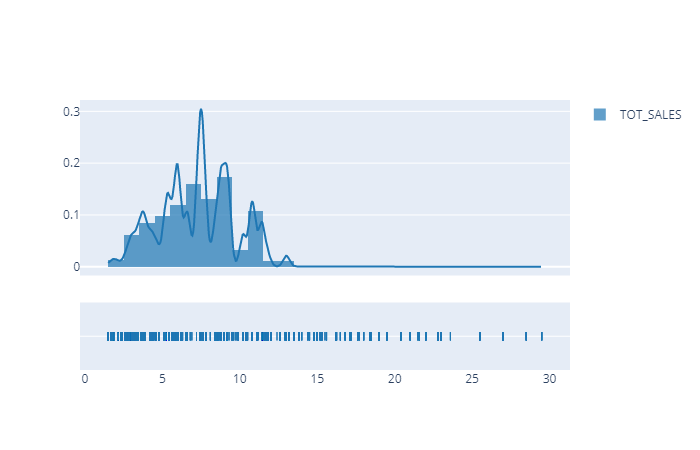

In [67]:
fig = ff.create_distplot([trans_df['TOT_SALES'].values], ['TOT_SALES'])
fig.show()

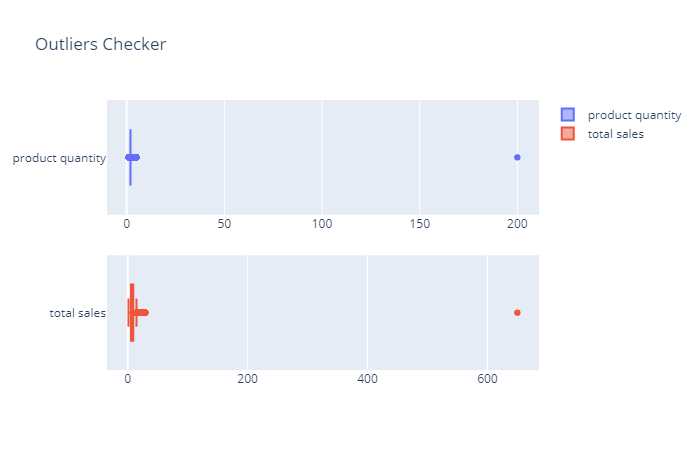

In [19]:
fig = make_subplots(rows=2, 
                    cols=1
                   )

fig.add_trace(go.Box(x=trans_df['PROD_QTY'], name='product quantity'),
              row=1, col=1)

fig.add_trace(go.Box(x=trans_df['TOT_SALES'], name='total sales'),
              row=2, col=1)

fig.update_layout(height=700, width=850,
                  title_text='Outliers Checker')

fig.show()

In [20]:
trans_df[trans_df['PROD_QTY'] > 150] # Just 2 transactions (not a loyal one, just drop it)

,LYLTY_CARD_NBR,DATE,STORE_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,LIFESTAGE,MEMBER_TYPE
36462,226000,2018-08-19,226,226201,4,Dorito Corn Chp Supreme 380g,200,650.0,OLDER FAMILIES,Premium
234299,226000,2019-05-20,226,226210,4,Dorito Corn Chp Supreme 380g,200,650.0,OLDER FAMILIES,Premium


In [21]:
(
    len(trans_df[trans_df['LYLTY_CARD_NBR'] == '226000']), 
    len(trans_df[trans_df['PROD_NBR'] == '4']),
    len(trans_df[trans_df['STORE_NBR'] == '226'])
)

(2, 3185, 2022)

In [22]:
# Remove outliers
trans_df = trans_df[trans_df['PROD_QTY'] < 150].reset_index(drop=True)

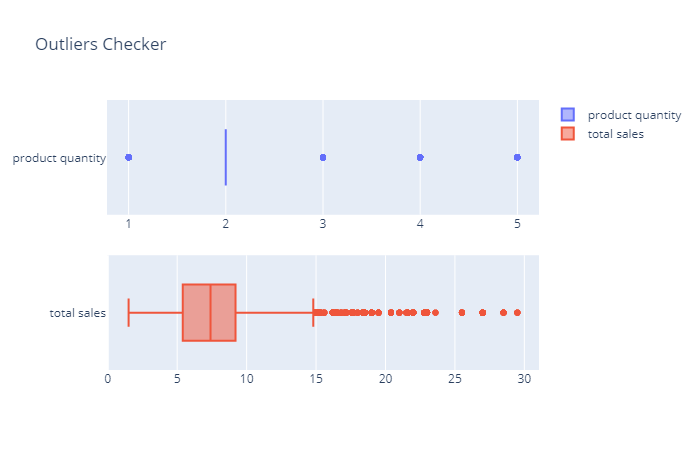

In [23]:
fig = make_subplots(rows=2, 
                    cols=1
                   )

fig.add_trace(go.Box(x=trans_df['PROD_QTY'], name='product quantity'),
              row=1, col=1)

fig.add_trace(go.Box(x=trans_df['TOT_SALES'], name='total sales'),
              row=2, col=1)

fig.update_layout(height=700, width=850,
                  title_text='Outliers Checker')

fig.show()

##### Feature Extraction Based On PROD_NAME Column

In [24]:
trans_df['PROD_NAME'].value_counts()

Kettle Mozzarella   Basil & Pesto 175g      3304
Kettle Tortilla ChpsHny&Jlpno Chili 150g    3296
Cobs Popd Swt/Chlli &Sr/Cream Chips 110g    3269
Tyrrells Crisps     Ched & Chives 165g      3268
Cobs Popd Sea Salt  Chips 110g              3265
                                            ... 
RRD Pc Sea Salt     165g                    1431
Woolworths Medium   Salsa 300g              1430
NCC Sour Cream &    Garden Chives 175g      1419
French Fries Potato Chips 175g              1418
WW Crinkle Cut      Original 175g           1410
Name: PROD_NAME, Length: 114, dtype: int64

In [25]:
# Extract the product brand first (actually there is product without brand like 'French Fries Potato' but assume they have the same)
trans_df['PROD_BRAND'] = trans_df['PROD_NAME'].apply(lambda x: x.split(' ')[0])

In [26]:
# This product has different format naming, so filtered it with the other
kettle_df = trans_df[trans_df['PROD_NAME'] == 'Kettle 135g Swt Pot Sea Salt']
other_df = trans_df[trans_df['PROD_NAME'] != 'Kettle 135g Swt Pot Sea Salt']

In [27]:
# The process of extraction
kettle_df['PROD_SIZE(g)'] = kettle_df['PROD_NAME'].apply(lambda x: x[7:10].strip())
kettle_df['PROD_NAME'] = kettle_df['PROD_NAME'].apply(lambda x: ' '.join(x[:7].split() + x[11:].split()))
other_df['PROD_SIZE(g)'] = other_df['PROD_NAME'].apply(lambda x: x[-4:-1].strip())
other_df['PROD_NAME'] = other_df['PROD_NAME'].apply(lambda x: ' '.join(x[:-4].split()))

In [28]:
# Join again these two categories with concat 
trans_df = pd.concat([kettle_df, other_df]).sort_index()

In [29]:
# Re-evaluate the product brands name
trans_df['PROD_BRAND'] = trans_df['PROD_BRAND'].replace({'Infzns': 'Infuzions',
                                                         'Smith': 'Smiths',
                                                         'Red': 'RedRD',
                                                         'RRD': 'RedRD',
                                                         'Dorito': 'Doritos',
                                                         'WW': 'Woolworths',
                                                         'Snbts': 'Sunbites',
                                                         'Grain': 'Sunbites',
                                                         'GrnWves': 'Sunbites',
                                                         'Natural': 'NaturalCC',
                                                         'NCC': 'NaturalCC',
                                                         'Burger': 'BurgerR',
                                                         'French': 'FrenchF'})

##### Change the columns order to show

In [30]:
col_list = list(trans_df.columns)

In [31]:
trans_df = trans_df[col_list[1:6] + col_list[-2:] + col_list[-6:-4] + [col_list[0]] + col_list[-4:-2]]

In [32]:
trans_df

,DATE,STORE_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_BRAND,PROD_SIZE(g),PROD_QTY,TOT_SALES,LYLTY_CARD_NBR,LIFESTAGE,MEMBER_TYPE
0,2018-07-01,78,76138,87,Infuzions BBQ Rib Prawn Crackers,Infuzions,110,2,7.6,78115,MIDAGE SINGLES/COUPLES,Mainstream
1,2018-07-01,220,219501,81,Pringles Original Crisps,Pringles,134,2,7.4,220035,YOUNG SINGLES/COUPLES,Mainstream
2,2018-07-01,141,142377,89,Kettle Sweet Chilli And Sour Cream,Kettle,175,2,10.8,141141,YOUNG SINGLES/COUPLES,Mainstream
3,2018-07-01,59,55832,17,Kettle Sensations BBQ&Maple,Kettle,150,2,9.2,59307,YOUNG SINGLES/COUPLES,Mainstream
4,2018-07-01,39,35147,107,Smiths Crinkle Cut French OnionDip,Smiths,150,2,5.2,39086,OLDER SINGLES/COUPLES,Mainstream
...,...,...,...,...,...,...,...,...,...,...,...,...
264829,2019-06-30,156,157872,93,Doritos Corn Chip Southern Chicken,Doritos,150,2,7.8,156186,OLDER SINGLES/COUPLES,Premium
264830,2019-06-30,110,113041,88,Kettle Honey Soy Chicken,Kettle,175,2,10.8,110247,OLDER SINGLES/COUPLES,Premium
264831,2019-06-30,187,189059,77,Doritos Corn Chips Nacho Cheese,Doritos,170,2,8.8,187156,YOUNG SINGLES/COUPLES,Mainstream
264832,2019-06-30,104,104313,114,Kettle Sensations Siracha Lime,Kettle,150,2,9.2,104098,OLDER FAMILIES,Budget


##### Total Sales

In [33]:
# There is no data in christmas day (25 December 2018), so added with nan value (to make the graph still looks good) - holiday
date_grp = trans_df.groupby('DATE').agg(sum)
date_grp.loc['2018-12-25'] = np.nan
date_grp.index = pd.to_datetime(date_grp.index).strftime('%Y-%m-%d')
date_grp = date_grp.sort_index()
# date_grp = date_grp.interpolate(method='linear')

txn_grp = trans_df[['DATE', 'TXN_ID']].groupby('DATE').agg(len)
txn_grp.columns = ['TXN_COUNTS']
txn_grp.loc['2018-12-25'] = np.nan
txn_grp.index = pd.to_datetime(txn_grp.index).strftime('%Y-%m-%d')
txn_grp = txn_grp.sort_index()
# txn_grp = txn_grp.interpolate(method='linear')

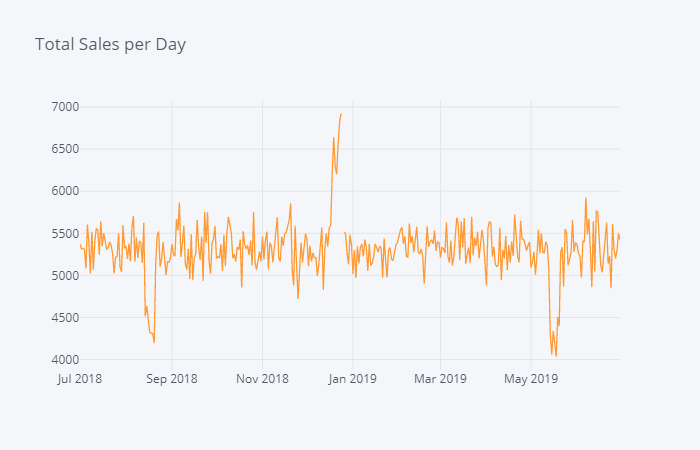

In [34]:
date_grp['TOT_SALES'].iplot(title='Total Sales per Day')

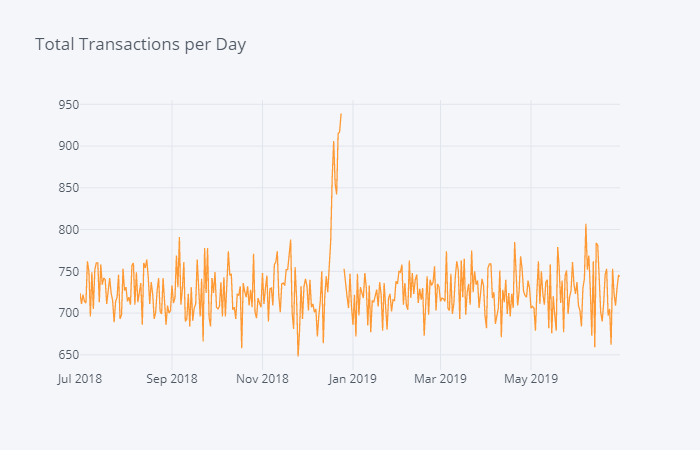

In [35]:
txn_grp.iplot(title='Total Transactions per Day')

> * The highest sales happened a day before christmas (24 December 2018): 6923 Sales <br>
-> Also this trend start increase drasctically 1 week before christmas day and the transactions in this week also have uptrend - no doubt<br><br>

> * The lowest sales happened on 18 May 2019: 4036.5 Sales <br>
-> Also this extreme downtrend start 1 week before, and this is also happened on August last year(2018) almost in the same date but for the transactions still look the same as the another days/weeks, so maybe there are some big discount in these two weeks maybe <br>

In [36]:
store_grp = trans_df.groupby('STORE_NBR', as_index=False).agg(sum)
store_grp = store_grp.sort_values(by='TOT_SALES', ascending=False).reset_index(drop=True)

In [37]:
store_grp['TOT_SALES'].describe().T

count      272.000000
mean      7107.040441
std       4705.862960
min          5.200000
25%       2899.425000
50%       5972.625000
75%      10952.775000
max      17605.450000
Name: TOT_SALES, dtype: float64

In [38]:
store_top_q = len(store_grp[store_grp['TOT_SALES'] >= 10952.775])
store_low_q = len(store_grp[store_grp['TOT_SALES'] <= 2899.425])

# How many store have total sales above and the same as the top quantile (75%)
print(f'Store in top quantile: {store_top_q}')

# How many store have total sales the same and below the low quantile (25%) - it must be the same as top quantile
print(f'Store in low quantile: {store_low_q}')

Store in top quantile: 68
Store in low quantile: 68


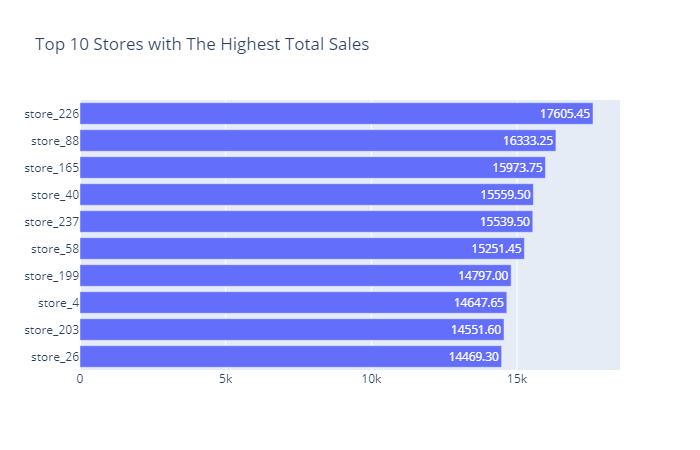

In [39]:
# Based on these 10 store check it also the most sold product there
make_bar_graph(store_grp['TOT_SALES'].values[:10],
               'store_' + store_grp['STORE_NBR'][:10],
               store_grp['TOT_SALES'].values[:10],
               'Top 10 Stores with The Highest Total Sales',
               '%{text:.2f}').show()

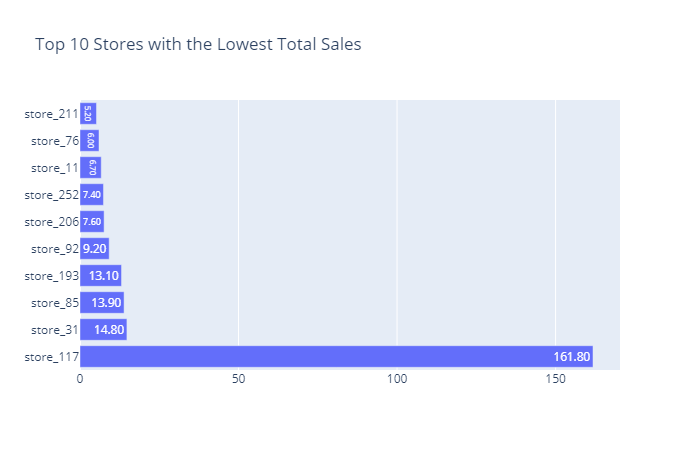

In [40]:
make_bar_graph(store_grp['TOT_SALES'].values[-10:],
               'store_' + store_grp['STORE_NBR'][-10:],
               store_grp['TOT_SALES'].values[-10:],
               'Top 10 Stores with the Lowest Total Sales',
               '%{text:.2f}',
               yaxis=None).show()

> It looks like the topdown 9 stores from store_211 until store_31 have super extreme low sales

##### Products Sold

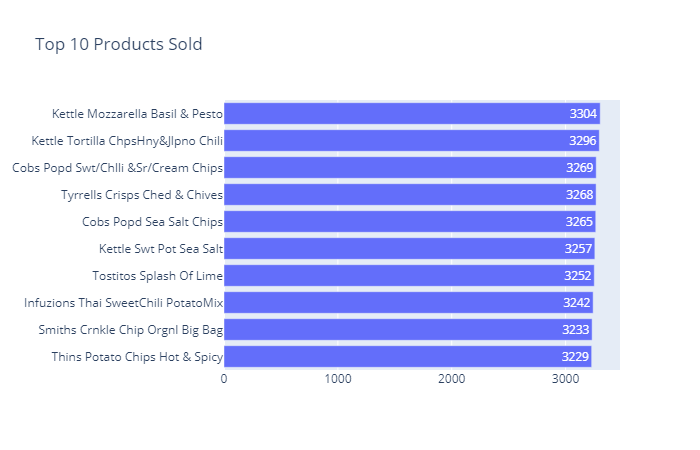

In [41]:
make_bar_graph(trans_df['PROD_NAME'].value_counts()[:10],
               trans_df['PROD_NAME'].value_counts().keys()[:10],
               trans_df['PROD_NAME'].value_counts()[:10],
               'Top 10 Products Sold').show()

> Based on this graph there is no significant different for the most sold products universally, so just skip it

In [42]:
name_prod_top = trans_df['PROD_NAME'].value_counts().keys()

for i in range(10):
    print(trans_df[trans_df['PROD_NAME'] == name_prod_top[i]]['PROD_SIZE(g)'].value_counts(), end='\n\n')

175    3304
Name: PROD_SIZE(g), dtype: int64

150    3296
Name: PROD_SIZE(g), dtype: int64

110    3269
Name: PROD_SIZE(g), dtype: int64

165    3268
Name: PROD_SIZE(g), dtype: int64

110    3265
Name: PROD_SIZE(g), dtype: int64

135    3257
Name: PROD_SIZE(g), dtype: int64

175    3252
Name: PROD_SIZE(g), dtype: int64

110    3242
Name: PROD_SIZE(g), dtype: int64

380    3233
Name: PROD_SIZE(g), dtype: int64

175    3229
Name: PROD_SIZE(g), dtype: int64



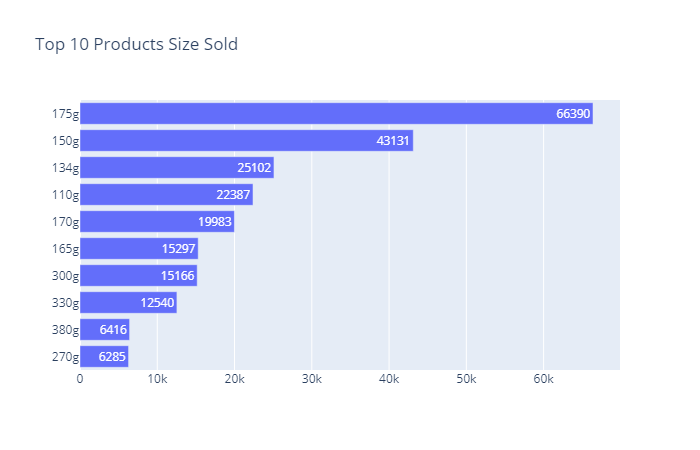

In [43]:
make_bar_graph(trans_df['PROD_SIZE(g)'].value_counts()[:10],
               [s + 'g' for s in trans_df['PROD_SIZE(g)'].value_counts().keys()[:10]],
               trans_df['PROD_SIZE(g)'].value_counts()[:10],
               'Top 10 Products Size Sold').show()

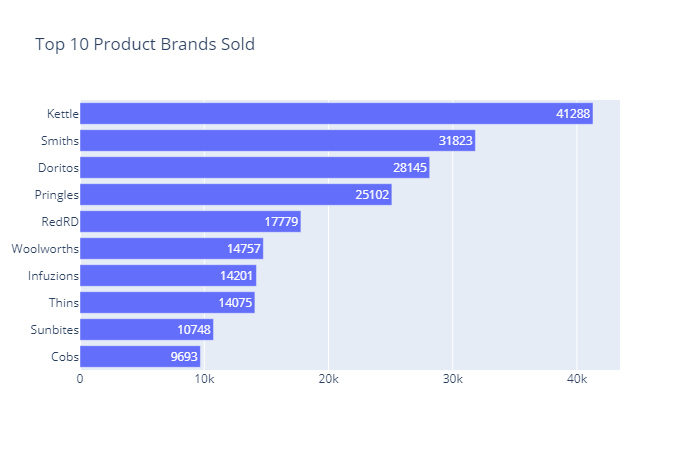

In [44]:
make_bar_graph(trans_df['PROD_BRAND'].value_counts()[:10],
               trans_df['PROD_BRAND'].value_counts().keys()[:10],
               trans_df['PROD_BRAND'].value_counts()[:10],
               'Top 10 Product Brands Sold').show()

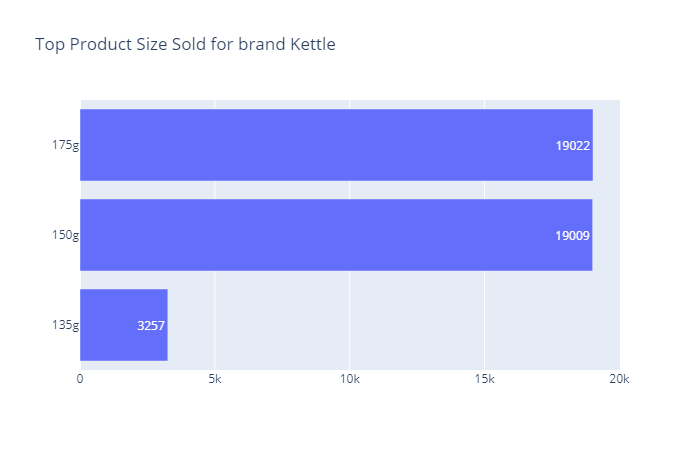

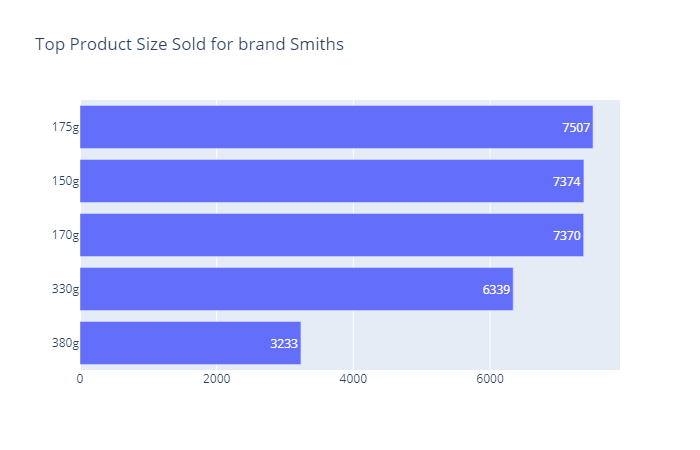

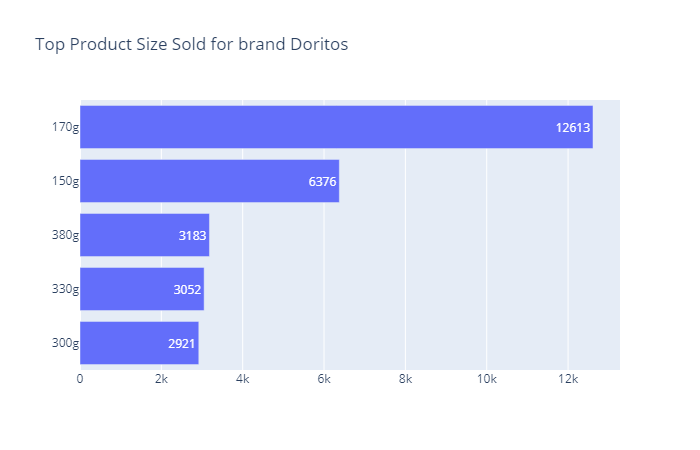

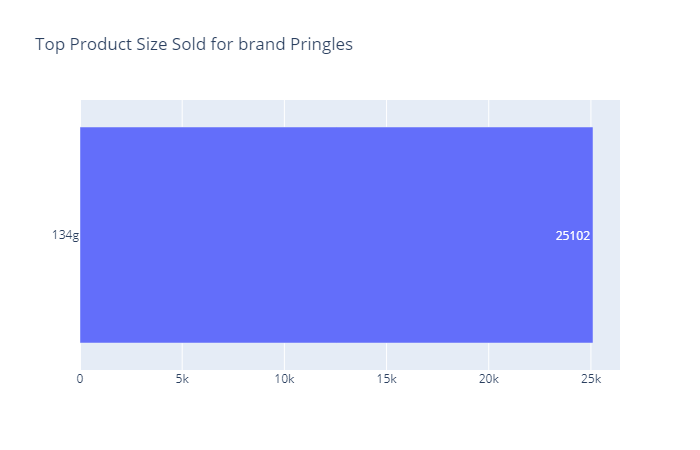

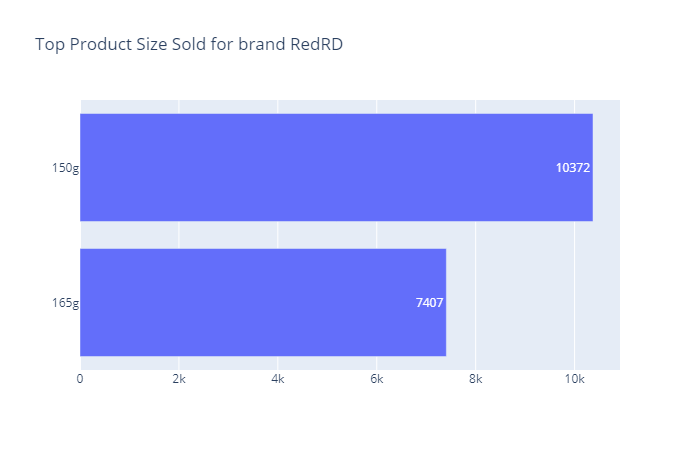

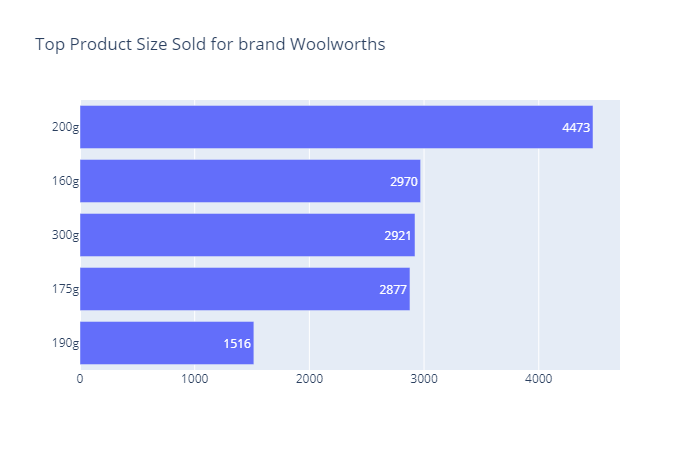

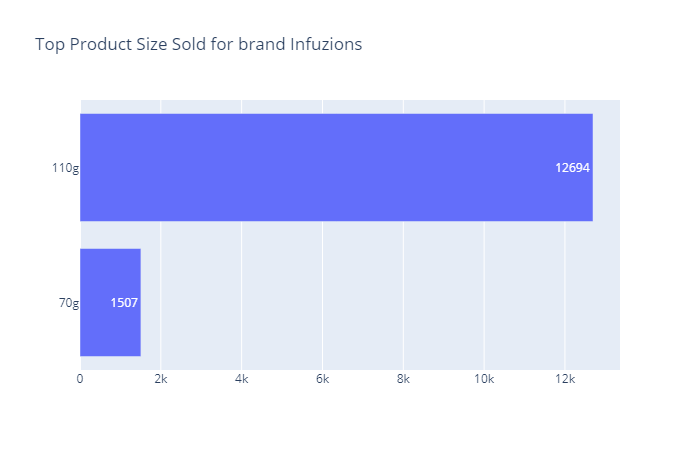

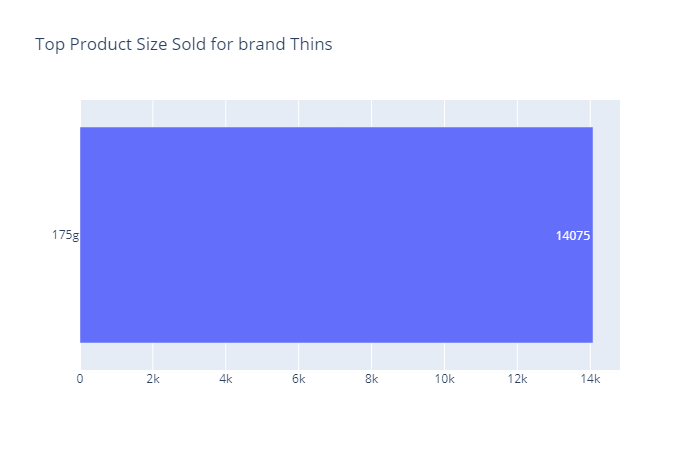

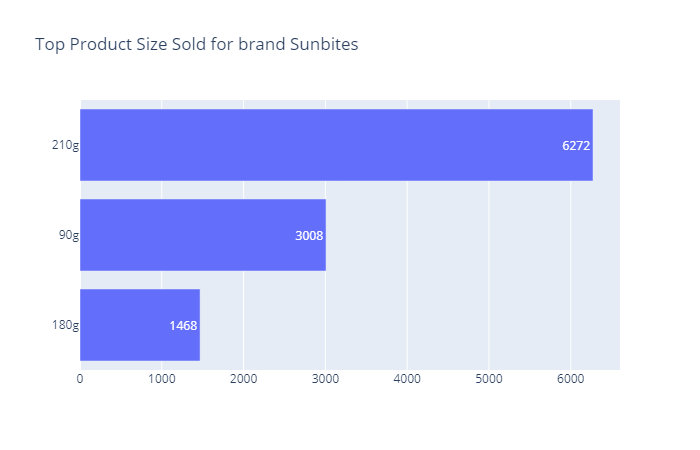

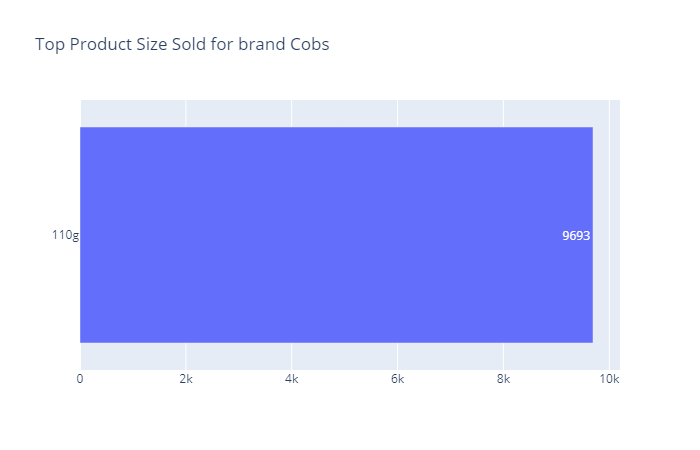

In [45]:
name_brand_top = trans_df['PROD_BRAND'].value_counts().keys()
name_brand_list = [trans_df[trans_df['PROD_BRAND'] == b] for b in name_brand_top]

for i in range(10):
    make_bar_graph(name_brand_list[i]['PROD_SIZE(g)'].value_counts()[:10],
                   [s + 'g' for s in name_brand_list[i]['PROD_SIZE(g)'].value_counts().keys()[:10]],
                   name_brand_list[i]['PROD_SIZE(g)'].value_counts()[:10],
                   'Top Product Size Sold for brand ' + 
                   str(name_brand_list[i]['PROD_BRAND'].values[0])).show()

In [46]:
# Filter based on the STORE_NBR and saved it in a list
top_store = [trans_df[trans_df['STORE_NBR'] == store_grp['STORE_NBR'].values[i]] for i in range(272)]

In [119]:
def bar_graph_top_10_info(index, list_df, title, column1, column2):
    return make_bar_graph(list_df[index][column1].value_counts()[:10],
                          list_df[index][column1].value_counts().keys()[:10],
                          list_df[index][column1].value_counts()[:10],
                          title + str(list_df[index][column2].values[0]))

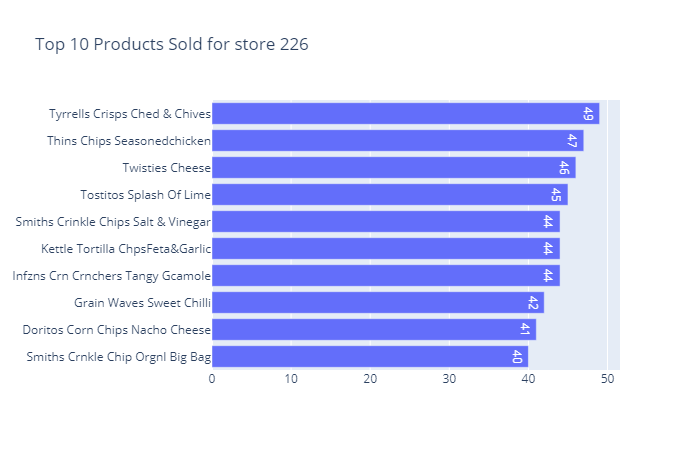

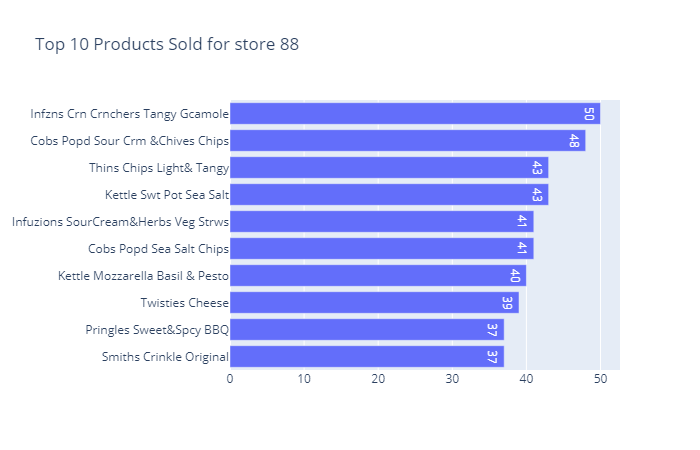

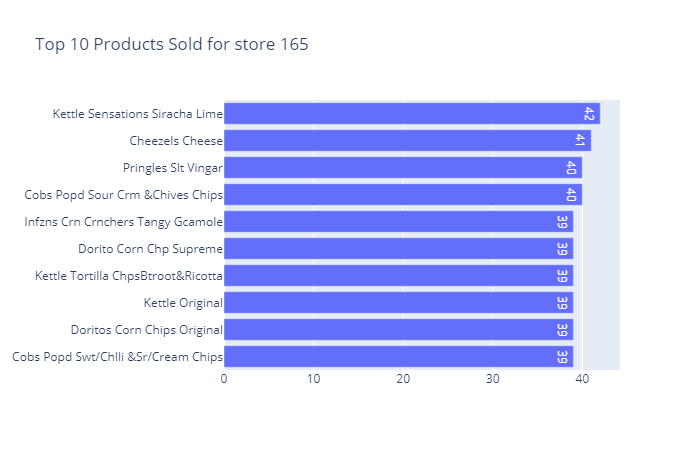

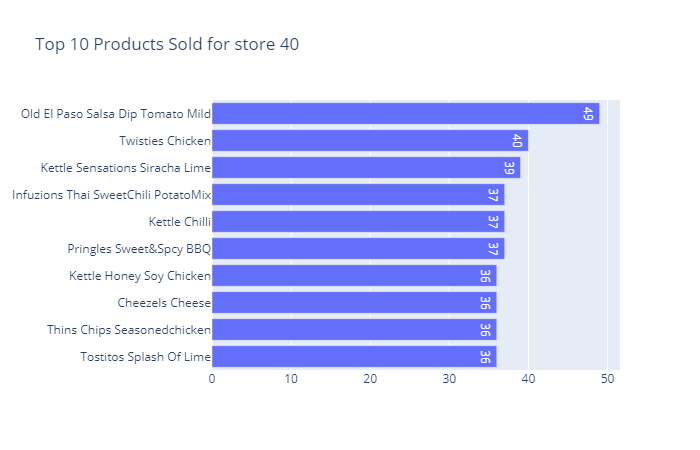

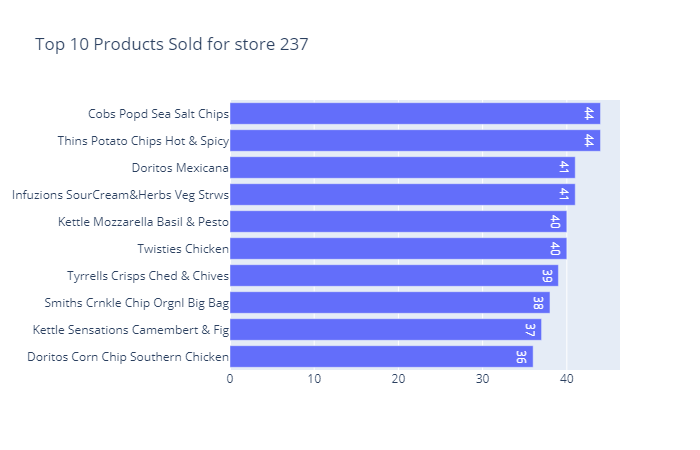

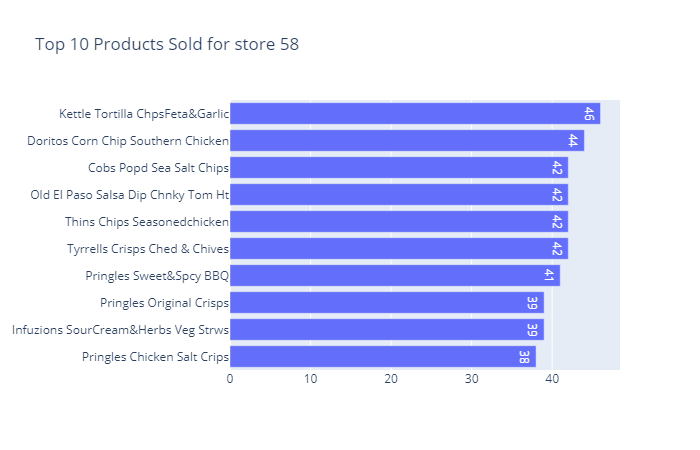

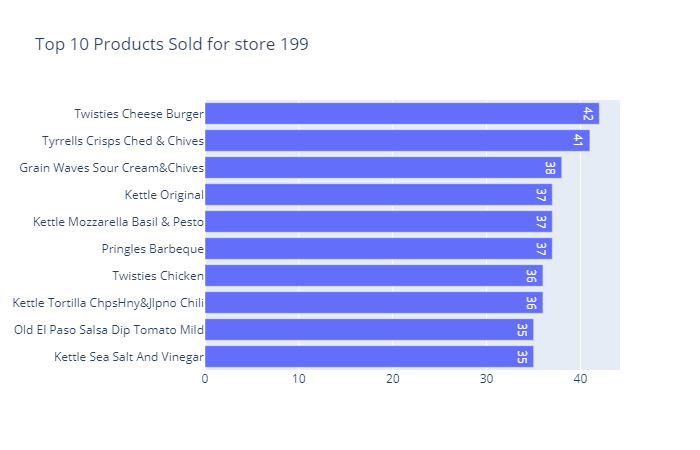

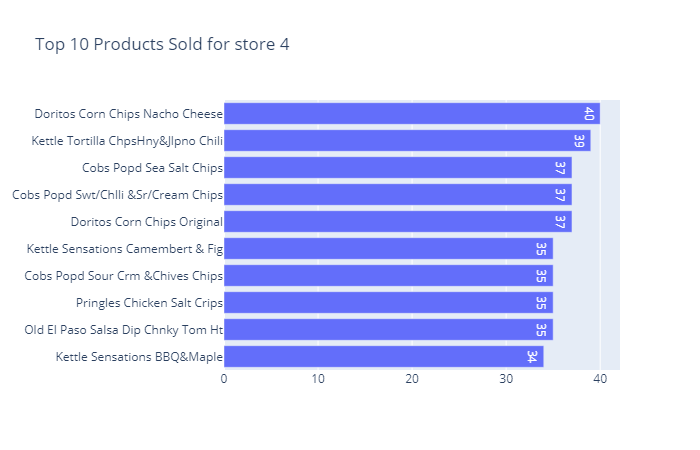

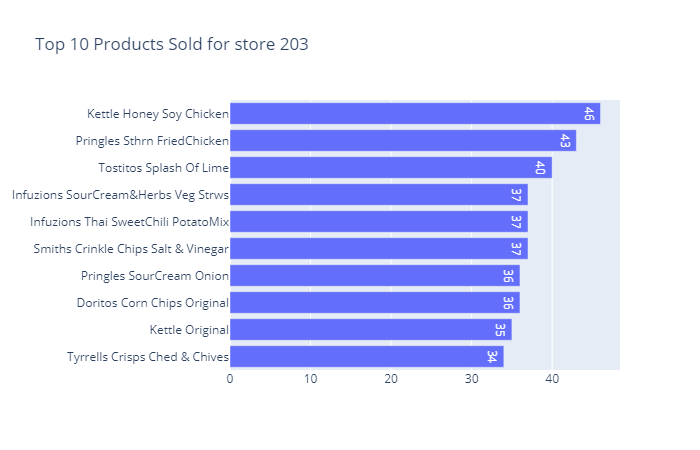

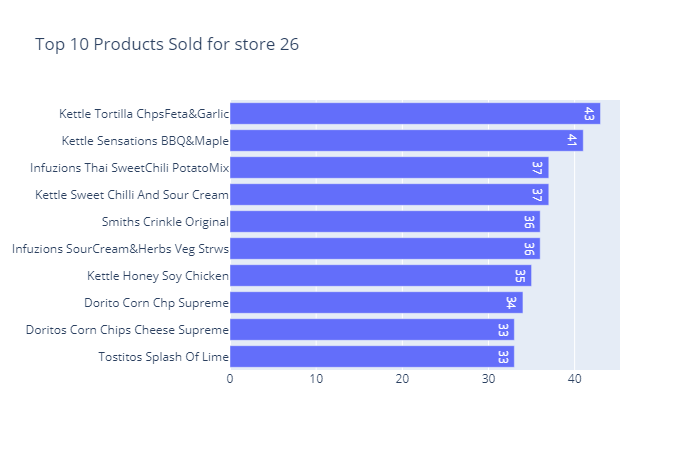

In [120]:
# Top products sold for top 10 stores with the highest sales
for i in range(10):
    bar_graph_top_10_info(i, top_store, 'Top 10 Products Sold for store ', 'PROD_NAME', 'STORE_NBR').show()

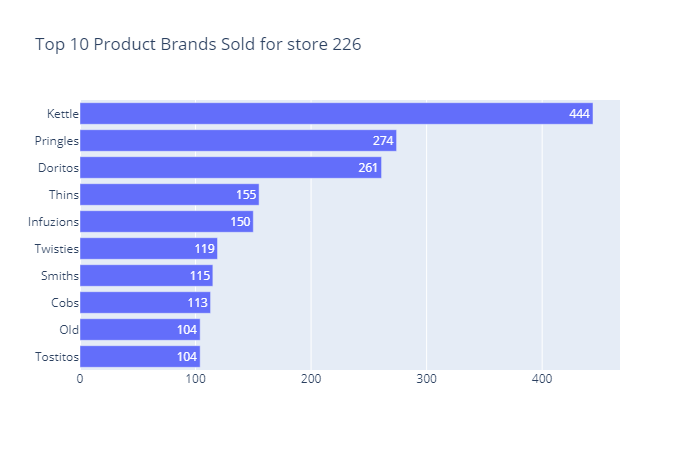

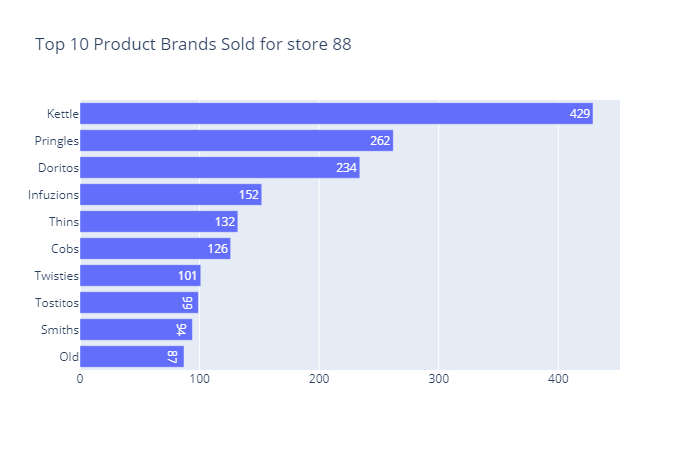

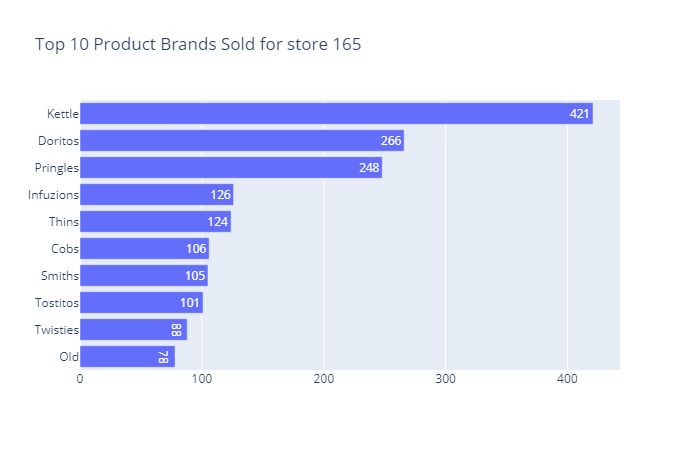

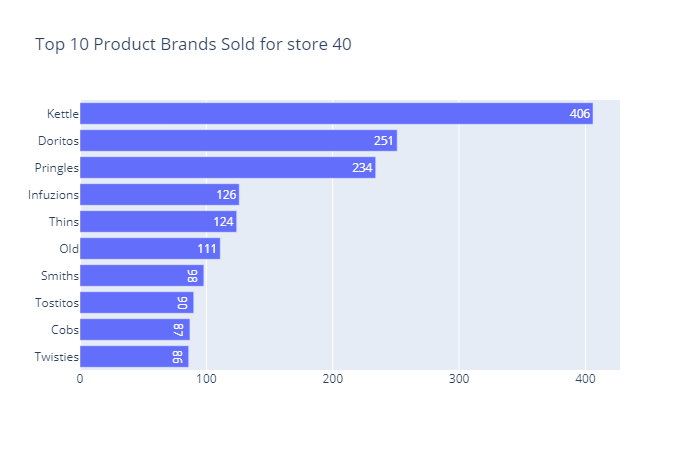

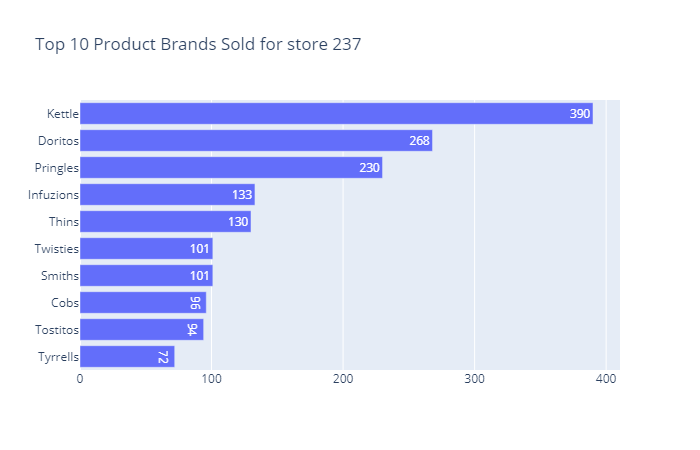

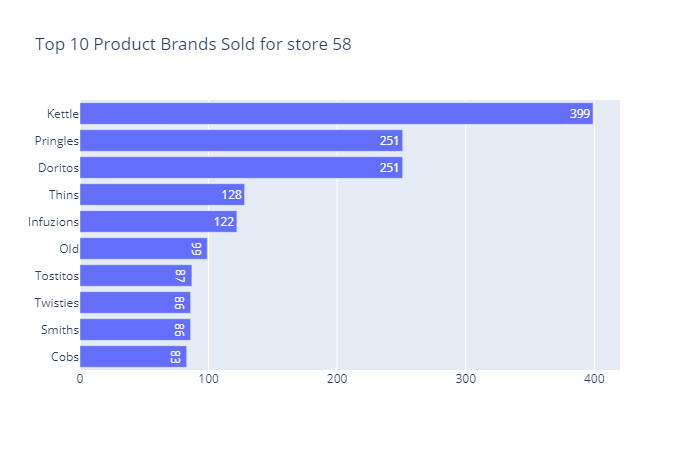

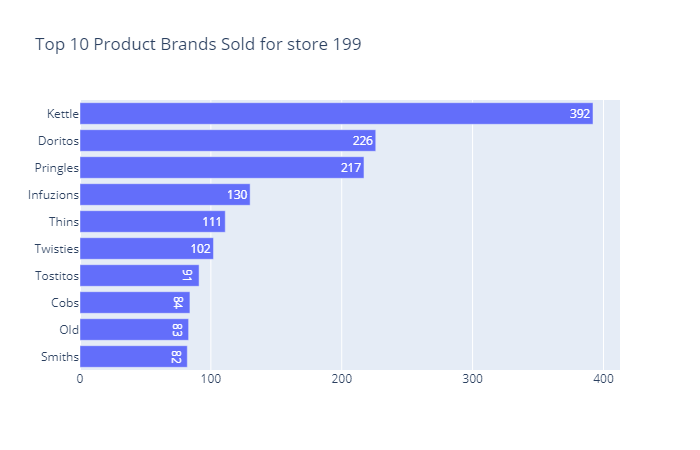

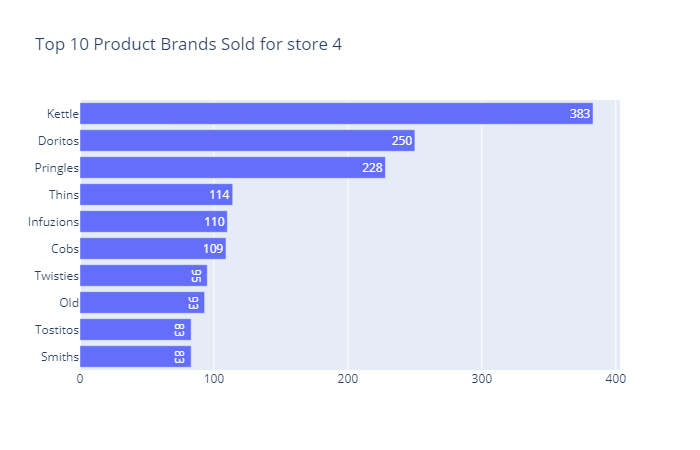

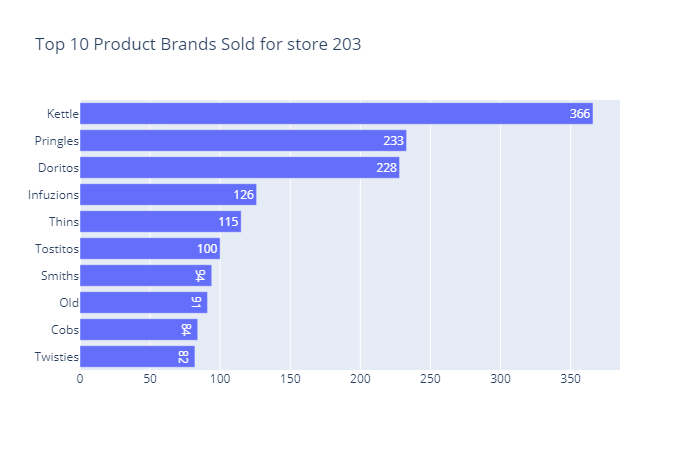

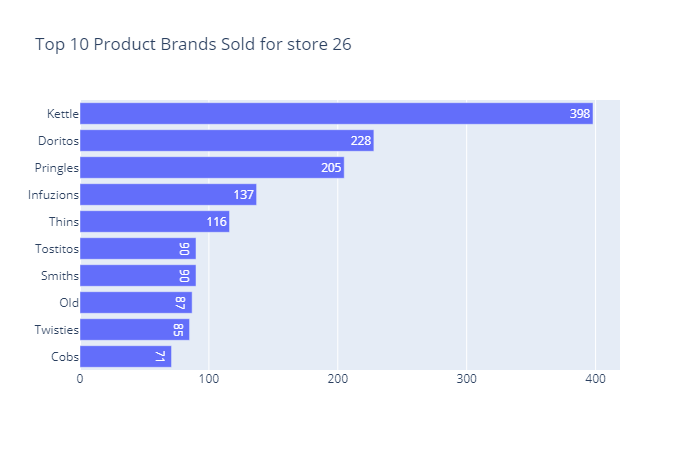

In [121]:
# Top brands sold for top 10 stores with the highest sales
for i in range(10):
    bar_graph_top_10_info(i, top_store, 'Top 10 Product Brands Sold for store ', 'PROD_BRAND', 'STORE_NBR').show()

> We can see from the top 10 stores with highest sales, they have the same top 5 brands with the high amount of sold: <br> * Kettle <br> * Pringles <br> * Doritos <br> * Infuzions <br> * Thins <br> <br>
But if we see universally, there are two brands that stand in the top 5 best (Smiths and RedRD) which not showed above, so I suggest to focused (like more stocks and suppliers) in these two along with the another 5 brands above.

##### Customer Category Counts

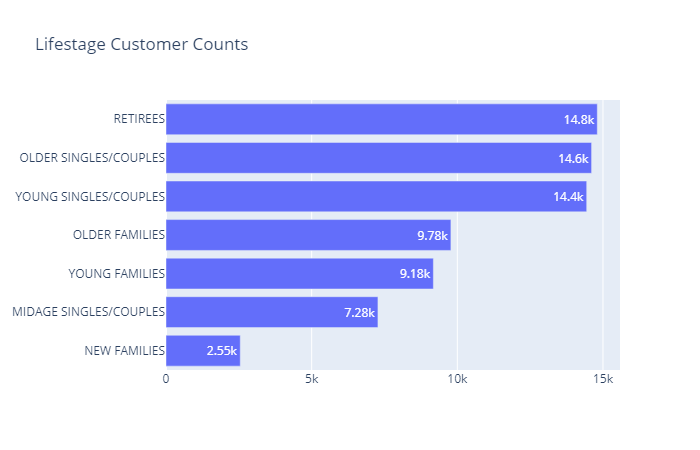

In [50]:
make_bar_graph(behav_df['LIFESTAGE'].value_counts(), 
               behav_df['LIFESTAGE'].value_counts().keys(),
               behav_df['LIFESTAGE'].value_counts(),
               'Lifestage Customer Counts',
               '%{text:.3s}').show()

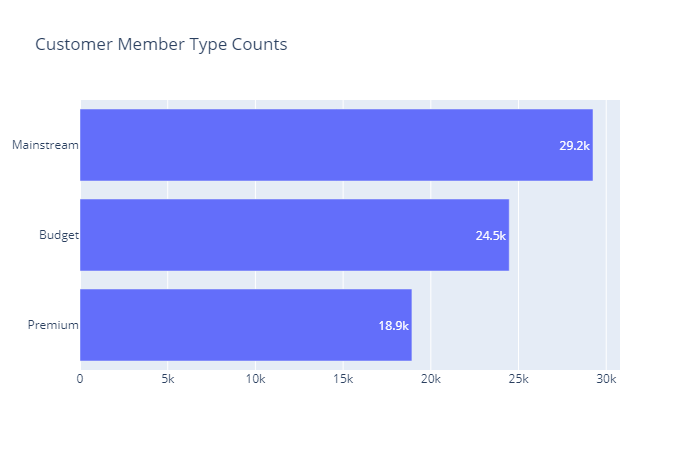

In [51]:
make_bar_graph(behav_df['MEMBER_TYPE'].value_counts(), 
               behav_df['MEMBER_TYPE'].value_counts().keys(),
               behav_df['MEMBER_TYPE'].value_counts(),
               'Customer Member Type Counts',
               '%{text:.3s}').show()

#### Customer Analytics

In [52]:
trans_df.iloc[-1]['DATE']

Timestamp('2019-06-30 00:00:00')

In [53]:
last_date = pd.to_datetime('2019-07-01')

In [54]:
# Aggregate dataframe to create Recency, Frequency, Monetary
customer_grp = trans_df.groupby('LYLTY_CARD_NBR', as_index=False).agg({'DATE': 
                                                                 lambda x: (last_date - x.max()).days,
                                                                 'TXN_ID': len,
                                                                 'TOT_SALES': sum})
lfstg_mbr_grp = trans_df.groupby(['LIFESTAGE', 'MEMBER_TYPE'], as_index=False).agg({'DATE': 
                                                                                  lambda x: (last_date - x.max()).days,
                                                                                  'TXN_ID': len,
                                                                                  'TOT_SALES': sum})

customer_grp.columns = ['LYLTY_CARD_NBR', 'RECENCY', 'FREQUENCY', 'MONETARY']
lfstg_mbr_grp.columns = ['LIFESTAGE', 'MEMBER_TYPE', 'RECENCY', 'FREQUENCY', 'MONETARY']

In [55]:
# Grouping the Recency, Frequency, Monetary
q = 4
recn = range(4, 0, -1)
fm = range(1, 5)

customer_grp['R'] = pd.qcut(customer_grp['RECENCY'], q, recn).values.astype(int)
customer_grp['F'] = customer_grp['FREQUENCY'].apply(lambda x: 1 if x < 5 else(2 if x < 9 else(3 if x < 14 else 4)))
customer_grp['M'] = pd.qcut(customer_grp['MONETARY'], q, fm).values.astype(int)

lfstg_mbr_grp['R'] = 4 # Only one recency value
lfstg_mbr_grp['F'] = pd.qcut(lfstg_mbr_grp['FREQUENCY'], q, fm).values.astype(int)
lfstg_mbr_grp['M'] = pd.qcut(lfstg_mbr_grp['MONETARY'], q, fm).values.astype(int)

In [56]:
# Sum up the R, F, M to calculate the total score
customer_grp['RFM_SCORE'] = customer_grp['R'] + customer_grp['F'] + customer_grp['M']
lfstg_mbr_grp['RFM_SCORE'] = lfstg_mbr_grp['R'] + lfstg_mbr_grp['F'] + lfstg_mbr_grp['M']

In [57]:
customer_grp['RFM_SCORE'].value_counts()

4     10454
6      9852
5      9768
3      9449
7      8171
8      8169
10     7210
9      7115
11     2360
12       88
Name: RFM_SCORE, dtype: int64

In [58]:
# Add the value of each customer
cust_labels = ['VERY LOW', 'LOW', 'MEDIUM', 'HIGH', 'VERY HIGH']

lfstg_mbr_grp['CUSTOMER_VALUE'] = lfstg_mbr_grp['RFM_SCORE'].apply(lambda x: 'VERY HIGH' if x == 12 
                                                               else('HIGH' if x == 10 
                                                               else('MEDIUM' if x == 8 else 'LOW')))
customer_grp['CUSTOMER_VALUE'] = pd.qcut(customer_grp['RFM_SCORE'], 5, cust_labels).values

In [85]:
lfstg_mbr_grp = lfstg_mbr_grp.sort_values('RFM_SCORE', ascending=False).reset_index(drop=True)

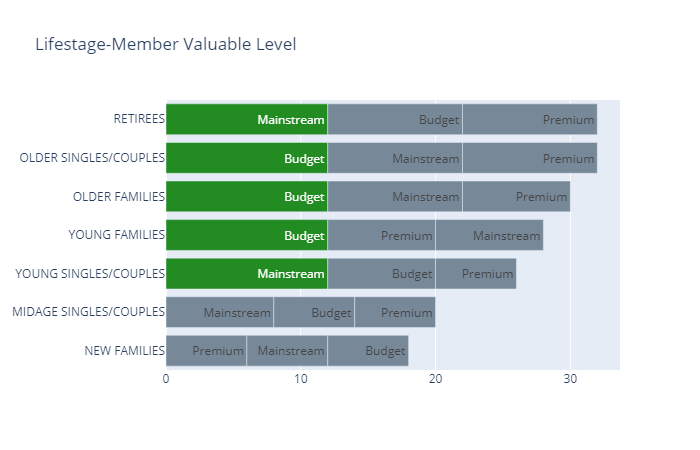

In [124]:
# The most valueable customer
colors = ['lightslategray'] * 21
colors[:5] = ['forestgreen'] * 5

fig = go.Figure(data=
                    go.Bar(x = lfstg_mbr_grp['RFM_SCORE'],
                           y = lfstg_mbr_grp['LIFESTAGE'],
                           text = lfstg_mbr_grp['MEMBER_TYPE'],
                           textposition = 'inside',
                           orientation = 'h',
                           marker={'color': colors})
    )
fig.update_layout(title='Lifestage-Member Valuable Level', 
                  yaxis={'categoryorder' : 'total ascending'})
fig.show()

In [131]:
# More specific analysis
top_br= [trans_df[(trans_df['LIFESTAGE'] == 'RETIREES') & (trans_df['MEMBER_TYPE'] == 'Mainstream')],
         trans_df[(trans_df['LIFESTAGE'] == 'OLDER SINGLES/COUPLES') & (trans_df['MEMBER_TYPE'] == 'Budget')],
         trans_df[(trans_df['LIFESTAGE'] == 'OLDER FAMILIES') & (trans_df['MEMBER_TYPE'] == 'Budget')],
         trans_df[(trans_df['LIFESTAGE'] == 'YOUNG FAMILIES') & (trans_df['MEMBER_TYPE'] == 'Budget')],
         trans_df[(trans_df['LIFESTAGE'] == 'YOUNG SINGLES/COUPLES') & (trans_df['MEMBER_TYPE'] == 'Mainstream')]]

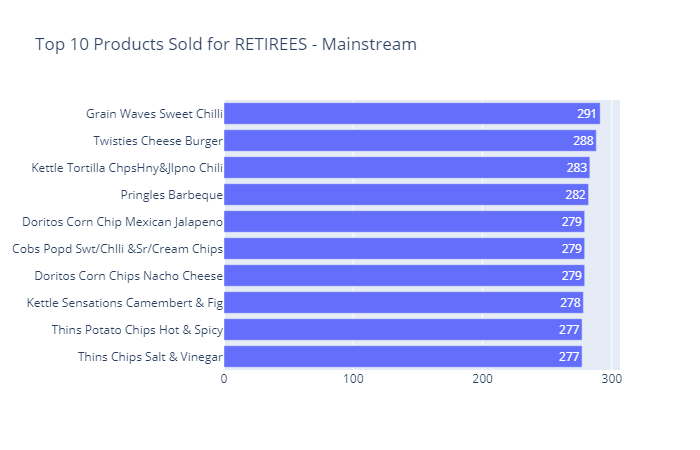

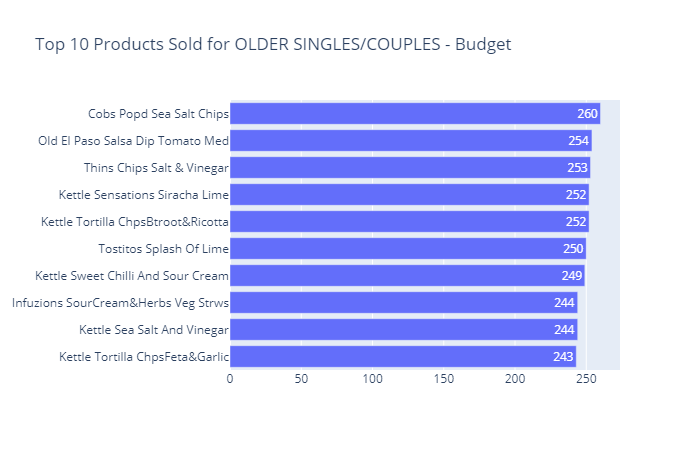

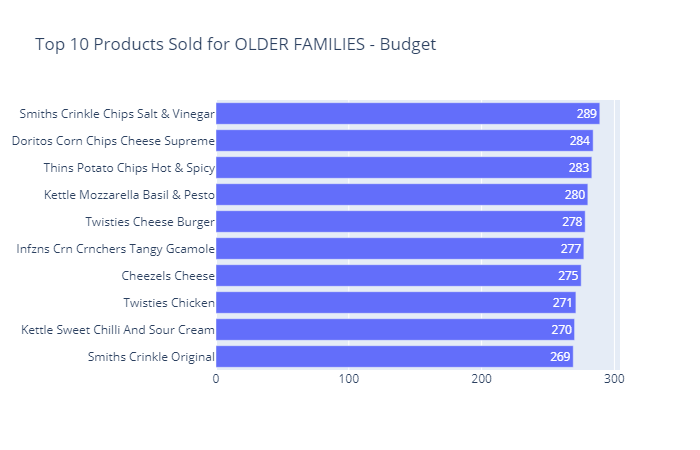

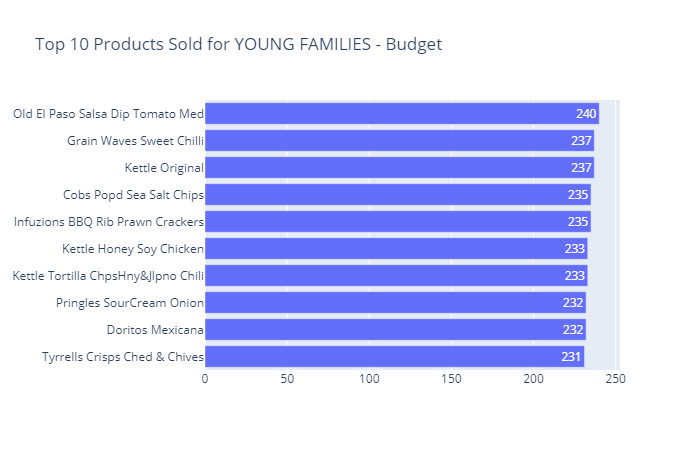

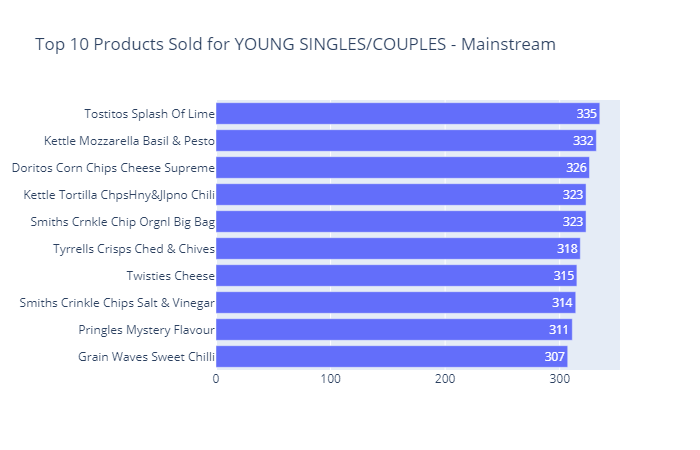

In [132]:
for i in range(len(top_br)):
    bar_graph_top_10_info(i, top_br, 
                          'Top 10 Products Sold for ' + str(top_br[i]['LIFESTAGE'].values[0]) +' - ', 
                          'PROD_NAME', 'MEMBER_TYPE').show()

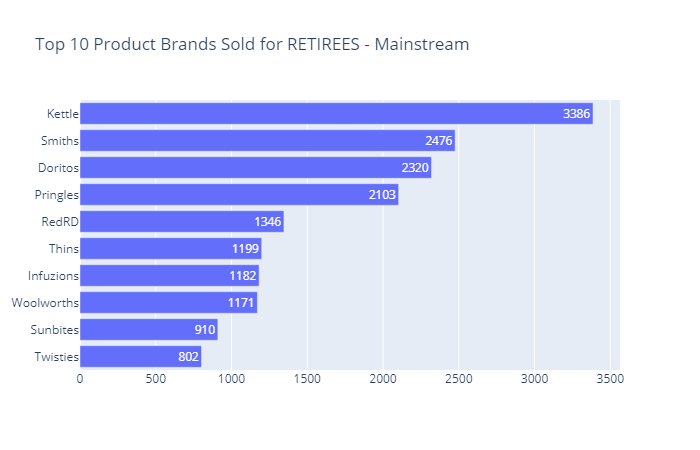

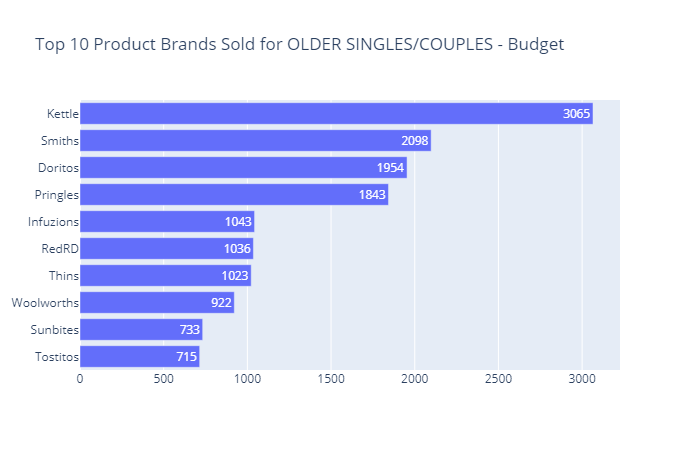

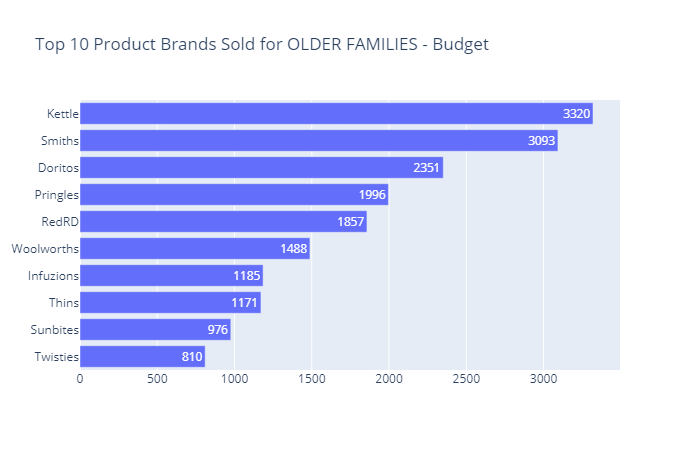

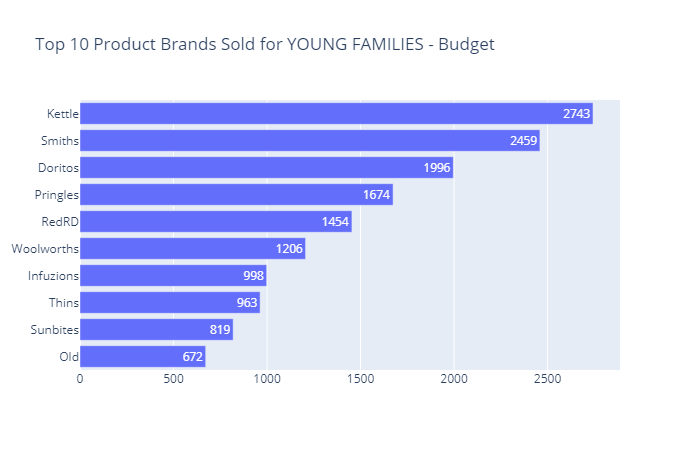

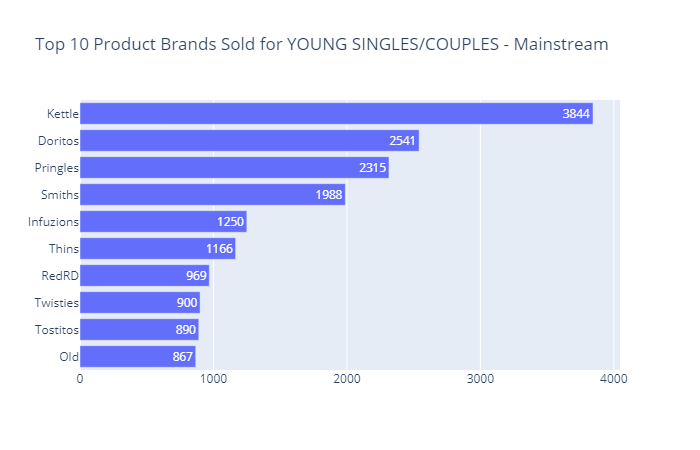

In [137]:
for i in range(len(top_br)):
    bar_graph_top_10_info(i, top_br, 
                          'Top 10 Product Brands Sold for ' + str(top_br[i]['LIFESTAGE'].values[0]) +' - ', 
                          'PROD_BRAND', 'MEMBER_TYPE').show()

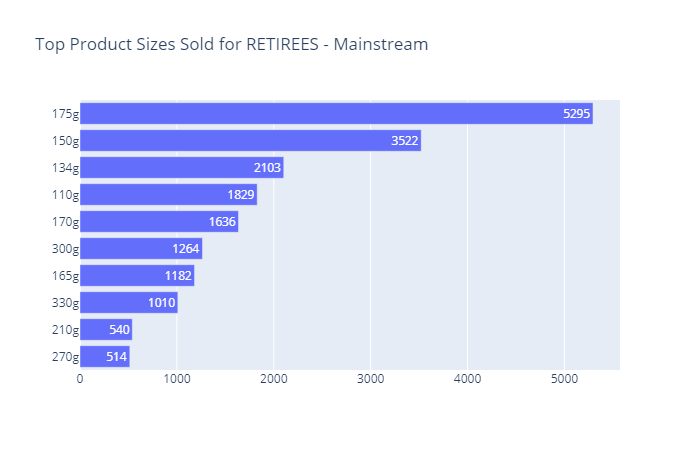

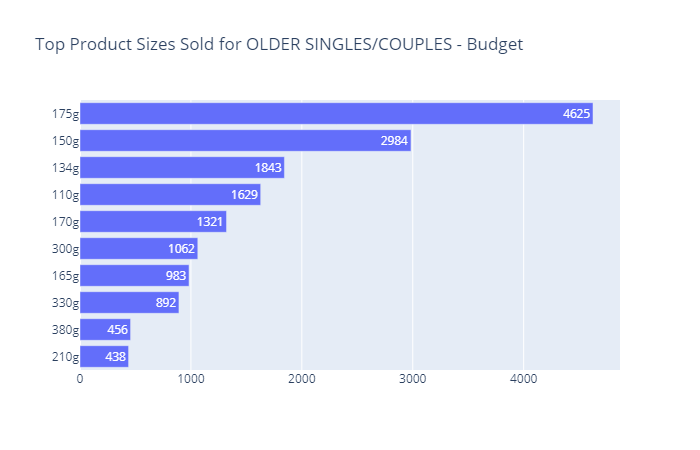

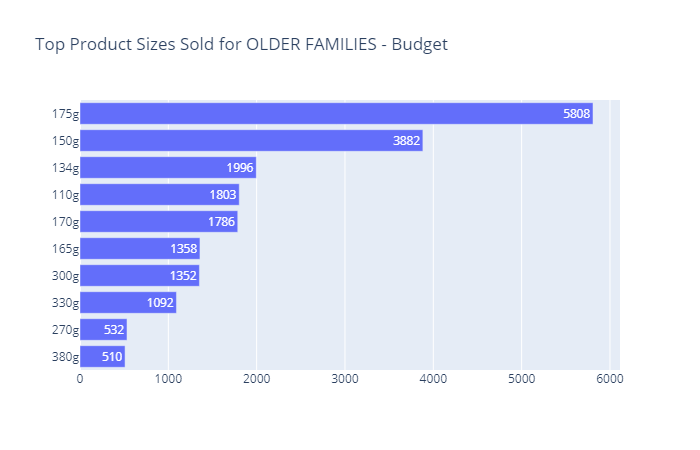

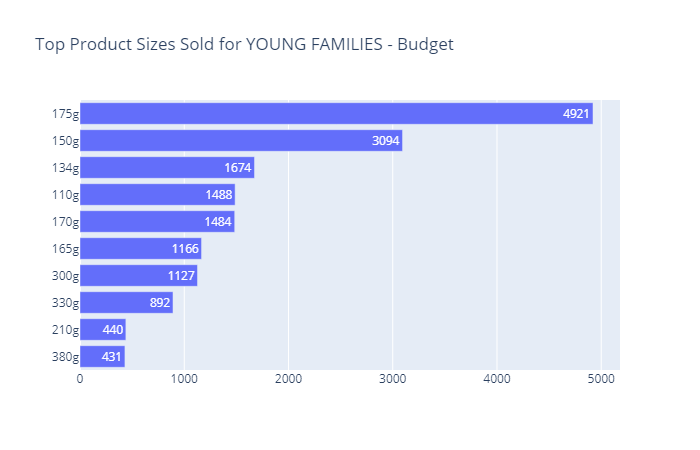

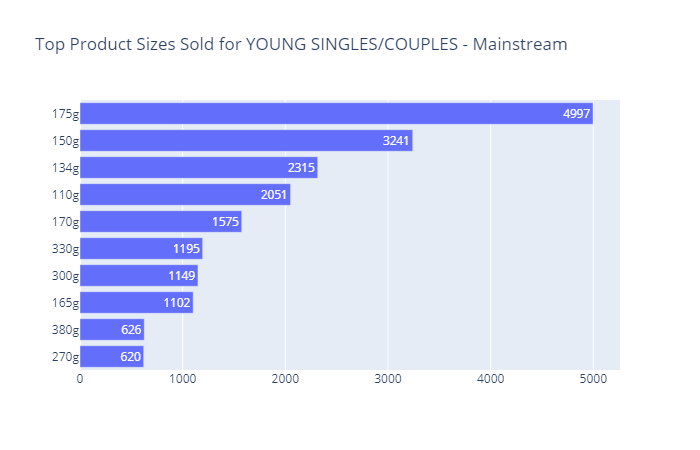

In [143]:
for i in range(len(top_br)):
    make_bar_graph(top_br[i]['PROD_SIZE(g)'].value_counts()[:10],
                   [s + 'g' for s in top_br[i]['PROD_SIZE(g)'].value_counts().keys()[:10]],
                   top_br[i]['PROD_SIZE(g)'].value_counts()[:10],
                   'Top Product Sizes Sold for ' + 
                   str(top_br[i]['LIFESTAGE'].values[0] + ' - ') +
                   str(top_br[i]['MEMBER_TYPE'].values[0])).show()

In [ ]:
for i in range(len(top_br)):
    bar_graph_top_10_info(i, top_br, 
                          'Top 10 Products Brand Sold for ' + str(top_br[i]['LIFESTAGE'].values[0]) +' - ', 
                          'PROD_BRAND', 'MEMBER_TYPE').show()

In [115]:
# Top 10 Customer with the highest valueable level
top_customer = customer_grp[customer_grp['CUSTOMER_VALUE'] == 'VERY HIGH']
top_customer['RECENCY'] = -(top_customer['RECENCY']) # For filtering purpose (descending)
top_customer = top_customer.sort_values(['RFM_SCORE', 'RECENCY', 'FREQUENCY', 'MONETARY'], ascending=False)
top_customer.head(10)

,LYLTY_CARD_NBR,RECENCY,FREQUENCY,MONETARY,R,F,M,RFM_SCORE,CUSTOMER_VALUE
32517,213140,-1,16,111.2,4,4,4,12,VERY HIGH
61529,63197,-1,15,132.8,4,4,4,12,VERY HIGH
50892,28020,-1,15,115.6,4,4,4,12,VERY HIGH
22732,179213,-1,14,107.8,4,4,4,12,VERY HIGH
37417,229188,-1,14,100.6,4,4,4,12,VERY HIGH
11254,138222,-1,14,100.3,4,4,4,12,VERY HIGH
57521,5025,-1,14,94.5,4,4,4,12,VERY HIGH
211,100190,-1,14,82.4,4,4,4,12,VERY HIGH
35508,222242,-2,16,109.2,4,4,4,12,VERY HIGH
8462,128203,-2,15,99.6,4,4,4,12,VERY HIGH


> <b><i>Last Summary</i></b>: <br><br>
Focused on these five categories ("VERY HIGH" Customer Value):
* Retirees - Mainstream
* Older Singles/Couples - Budget
* Older Families - Budget
* Young Families - Budget
* Young Singles/Couples - Mainstream <br><br>
with top 4 brands
* Kettle
* Smiths
* Doritos
* Pringles <br><br>
and the size
* 175g
* 150g
* 134g